<center><img src="https://github.com/pandas-dev/pandas/raw/main/web/pandas/static/img/pandas.svg" alt="pandas Logo" style="width: 800px;"/></center>

# Exploratory Analysis with Pandas

## Overview
1. Data Access and Reading
1. Understanding the Pandas Data Structure
1. Exploratory Data Analysis

## Prerequisites

| Concepts | Importance | Notes |
| --- | --- | --- |
| [Python Quickstart](../../foundations/quickstart) | Necessary | Intro to `dict` |
| [Numpy Basics](../numpy/numpy-basics) | Necessary | |

* **Time to learn**: 30 minutes

## Imports

In [1]:
import pandas as pd

## Data Access and Reading
The data for this example/notebook is available from the CSIRO Kennaook/Cape Grim page
https://www.csiro.au/en/research/natural-environment/atmosphere/latest-greenhouse-gas-data

More details on the science motivation, data overview, and data citation practices are available on that website. We staged data for you locally in preparation for this workshop - which would be the same as going to the page, downloading, and uploading to this Jupyterhub Space.

### Try Reading the Data with Pandas

In [2]:
df = pd.read_csv("../data/CapeGrim_CO2_data_download.csv")

UnicodeDecodeError: 'utf-8' codec can't decode byte 0x91 in position 38419: invalid start byte

### Troubleshooting the Data Reading
By default, we cannot read the data! We need to pass more information to pandas to be able to read the data. For example, if we open the file with a text reader, we notice there is a good amount of **metadata** at the top of the file

**Metadata: Data about our data. This provides helpful links, when data was processed, and units. All of this data is critical to understanding our data before we perform analysis.**

In [3]:
df = pd.read_csv("../data/CapeGrim_CO2_data_download.csv",
                 skiprows=24, # the number of rows at the top of the file with metadata
                 skipfooter=70, # the number of rows at the bottom of the file with metadata
                 encoding = "ISO-8859-1") # there are some special characters - we need a specific encoding
df

/var/folders/bw/c9j8z20x45s2y20vv6528qjc0000gq/T/ipykernel_85673/2633201338.py:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support skipfooter; you can avoid this warning by specifying engine='python'.
  df = pd.read_csv("../data/CapeGrim_CO2_data_download.csv",


,YYYY,MM,DD,DATE,CO2(ppm),SD(ppm),GR(ppm/yr),Source
0,1976,5,15,1976.36890,328.861,0.165,NaN,in situ
1,1976,6,15,1976.45360,328.988,0.285,NaN,in situ
2,1976,7,15,1976.53550,329.653,0.282,NaN,in situ
3,1976,8,15,1976.62020,330.550,0.201,NaN,in situ
4,1976,9,15,1976.70490,330.872,0.234,NaN,in situ
...,...,...,...,...,...,...,...,...
579,2024,8,15,2024.62022,420.795,0.157,NaN,in situ
580,2024,9,15,2024.70492,421.180,0.139,NaN,in situ
581,2024,10,15,2024.78689,421.397,0.097,NaN,in situ
582,2024,11,15,2024.87158,421.414,0.156,NaN,in situ


## Understanding the Pandas Data Structure

### The pandas [`DataFrame`](https://pandas.pydata.org/docs/user_guide/dsintro.html#dataframe)...
...is a **labeled**, two-dimensional columnar structure, similar to a table, spreadsheet, or the R `data.frame`.

![dataframe schematic](https://github.com/pandas-dev/pandas/raw/main/doc/source/_static/schemas/01_table_dataframe.svg "Schematic of a pandas DataFrame")

The `columns` that make up our `DataFrame` can be lists, dictionaries, NumPy arrays, pandas `Series`, or many other data types not mentioned here. Within these `columns`, you can have data values of many different data types used in Python and NumPy, including text, numbers, and dates/times. The first column of a `DataFrame`, shown in the image above in dark gray, is uniquely referred to as an `index`; this column contains information characterizing each row of our `DataFrame`. Similar to any other `column`, the `index` can label rows by text, numbers, datetime objects, and many other data types. Datetime objects are a quite popular way to label rows.

For our first example using Pandas DataFrames, we start by reading in some data in comma-separated value (`.csv`) format. We retrieve this dataset from our local data directory; however, the dataset was originally contained within the CSIRO data page. This dataset contains many types of greenhouse gas data, including gas measurements at Kennaook/Cape Grim. For more information on this dataset, review the description [here](https://www.csiro.au/en/research/natural-environment/atmosphere/latest-greenhouse-gas-data).

In [4]:
df.index

RangeIndex(start=0, stop=584, step=1)

The `DataFrame` index, as described above, contains information characterizing rows; each row has a unique ID value, which is displayed in the index column.  By default, the IDs for rows in a `DataFrame` are represented as sequential integers, which start at 0.

At the moment, the index column of our DataFrame is not very helpful for humans. However, Pandas has clever ways to make index columns more human-readable. The next example demonstrates how to use optional keyword arguments to convert DataFrame index IDs to a human-friendly datetime format.

In [47]:
df = pd.read_csv("../data/CapeGrim_CO2_data_download.csv",
                 skiprows=24, # the number of rows at the top of the file with metadata
                 skipfooter=70, # the number of rows at the bottom of the file with metadata
                 encoding = "ISO-8859-1", # there are some special characters - we need a specific encoding
                 parse_dates={"date":["MM", "DD", "YYYY"]}, # parse the date columns
                 engine="python", # make sure we use the python engine
                 index_col=0) 
df

/var/folders/bw/c9j8z20x45s2y20vv6528qjc0000gq/T/ipykernel_85673/3271322259.py:1: FutureWarning: Support for nested sequences for 'parse_dates' in pd.read_csv is deprecated. Combine the desired columns with pd.to_datetime after parsing instead.
  df = pd.read_csv("../data/CapeGrim_CO2_data_download.csv",


,DATE,CO2(ppm),SD(ppm),GR(ppm/yr),Source
date,,,,,
1976-05-15,1976.36890,328.861,0.165,NaN,in situ
1976-06-15,1976.45360,328.988,0.285,NaN,in situ
1976-07-15,1976.53550,329.653,0.282,NaN,in situ
1976-08-15,1976.62020,330.550,0.201,NaN,in situ
1976-09-15,1976.70490,330.872,0.234,NaN,in situ
...,...,...,...,...,...
2024-08-15,2024.62022,420.795,0.157,NaN,in situ
2024-09-15,2024.70492,421.180,0.139,NaN,in situ
2024-10-15,2024.78689,421.397,0.097,NaN,in situ


Each of our data rows is now helpfully labeled by a datetime-object-like index value; this means that we can now easily identify data values not only by named columns, but also by date labels on rows. This is a sneak preview of the `DatetimeIndex` functionality of Pandas; this functionality enables a large portion of Pandas' timeseries-related usage. Don't worry; `DatetimeIndex` will be discussed in full detail later on this page. In the meantime, let's look at the columns of data read in from the `.csv` file:

In [6]:
df.columns

Index(['DATE', 'CO2(ppm)', 'SD(ppm)', 'GR(ppm/yr)', 'Source'], dtype='object')

### The pandas [`Series`](https://pandas.pydata.org/docs/user_guide/dsintro.html#series)...

...is essentially any one of the columns of our `DataFrame`. A `Series` also includes the index column from the source `DataFrame`, in order to provide a label for each value in the `Series`.

![pandas Series](https://github.com/pandas-dev/pandas/raw/main/doc/source/_static/schemas/01_table_series.svg "Schematic of a pandas Series")

The pandas `Series` is a fast and capable 1-dimensional array of nearly any data type we could want, and it can behave very similarly to a NumPy `ndarray` or a Python `dict`. You can take a look at any of the `Series` that make up your `DataFrame`, either by using its column name and the Python `dict` notation, or by using dot-shorthand with the column name:

In [7]:
df["CO2(ppm)"]

date
1976-05-15    328.861
1976-06-15    328.988
1976-07-15    329.653
1976-08-15    330.550
1976-09-15    330.872
               ...   
2024-08-15    420.795
2024-09-15    421.180
2024-10-15    421.397
2024-11-15    421.414
2024-12-15    421.377
Name: CO2(ppm), Length: 584, dtype: float64

### Slicing and Dicing the `DataFrame` and `Series`

In this section, we will expand on topics covered in the previous sections on this page. One of the most important concepts to learn about Pandas is that it allows you to _**access anything by its associated label**_, regardless of data organization structure.

#### Indexing a `Series`

As a review of previous examples, we'll start our next example by pulling a `Series` out of our `DataFrame` using its column label.

In [8]:
co2_series = df["CO2(ppm)"]

co2_series

date
1976-05-15    328.861
1976-06-15    328.988
1976-07-15    329.653
1976-08-15    330.550
1976-09-15    330.872
               ...   
2024-08-15    420.795
2024-09-15    421.180
2024-10-15    421.397
2024-11-15    421.414
2024-12-15    421.377
Name: CO2(ppm), Length: 584, dtype: float64

You can use syntax similar to that of NumPy `ndarrays` to index, select, and subset with Pandas `Series`, as shown in this example:

In [9]:
co2_series["1982-01-01":"1982-12-01"]

date
1982-01-15    337.306
1982-02-15    337.127
1982-03-15    337.274
1982-04-15    337.698
1982-05-15    338.032
1982-06-15    338.186
1982-07-15    338.551
1982-08-15    338.898
1982-09-15    338.822
1982-10-15    338.634
1982-11-15    338.557
Name: CO2(ppm), dtype: float64

This is an example of label-based slicing. With label-based slicing, Pandas will automatically find a range of values based on the labels you specify.

<div class="admonition alert alert-info">
    <p class="admonition-title" style="font-weight:bold">Info</p>
    As opposed to index-based slices, label-based slices are <b>inclusive</b> of the final value.
</div>

If you already have some knowledge of xarray (used with ACT), you will quite likely know how to create slice objects by hand. This can also be used in pandas, as shown below. If you are completely unfamiliar with xarray, it will be covered on a later Pythia tutorial page.

In [10]:
co2_series[slice("1982-01-01", "1982-12-01")]

date
1982-01-15    337.306
1982-02-15    337.127
1982-03-15    337.274
1982-04-15    337.698
1982-05-15    338.032
1982-06-15    338.186
1982-07-15    338.551
1982-08-15    338.898
1982-09-15    338.822
1982-10-15    338.634
1982-11-15    338.557
Name: CO2(ppm), dtype: float64

#### Using `.iloc` and `.loc` to index

In this section, we introduce ways to access data that are preferred by Pandas over the methods listed above. When accessing by label, it is preferred to use the `.loc` method, and when accessing by index, the `.iloc` method is preferred. These methods behave similarly to the notation introduced above, but provide more speed, security, and rigor in your value selection. Using these methods can also help you avoid [chained assignment warnings](https://pandas.pydata.org/docs/user_guide/indexing.html#returning-a-view-versus-a-copy) generated by pandas.

In [11]:
co2_series.iloc[3]

np.float64(330.55)

In [12]:
co2_series.iloc[0:12]

date
1976-05-15    328.861
1976-06-15    328.988
1976-07-15    329.653
1976-08-15    330.550
1976-09-15    330.872
1976-10-15    330.899
1976-11-15    330.883
1976-12-15    330.677
1977-01-15    330.529
1977-02-15    330.543
1977-03-15    330.724
1977-04-15    330.805
Name: CO2(ppm), dtype: float64

In [13]:
co2_series.loc["1976-05-15"]

np.float64(328.861)

In [14]:
co2_series.loc["1977-01-01":"1977-12-31"]

date
1977-01-15    330.529
1977-02-15    330.543
1977-03-15    330.724
1977-04-15    330.805
1977-05-15    331.007
1977-06-15    331.500
1977-07-15    331.800
1977-08-15    332.327
1977-09-15    332.940
1977-10-15    333.034
1977-11-15    332.778
1977-12-15    332.377
Name: CO2(ppm), dtype: float64

#### Extending to the `DataFrame`

These subsetting capabilities can also be used in a full `DataFrame`; however, if you use the same syntax, there are issues, as shown below:

In [15]:
df["1977-01-01"]

KeyError: '1977-01-01'

<div class="admonition alert alert-danger">
    <p class="admonition-title" style="font-weight:bold">Danger</p>
    Attempting to use <code>Series</code> subsetting with a <code>DataFrame</code> can crash your program. A proper way to subset a <code>DataFrame</code> is shown below.
</div>

When indexing a `DataFrame`, pandas will not assume as readily the intention of your code. In this case, using a row label by itself will not work; **with `DataFrames`, labels are used for identifying columns**.

In [ ]:
df["CO2(ppm)"]

As shown below, you also cannot subset columns in a `DataFrame` using integer indices:

In [16]:
df[0]

KeyError: 0

From earlier examples, we know that we can use an index or label with a DataFrame to pull out a column as a Series, and we know that we can use an index or label with a Series to pull out a single value. Therefore, by chaining brackets, we can pull any individual data value out of the DataFrame.

In [17]:
df["CO2(ppm)"]["1982-04-15"]

np.float64(337.698)

In [18]:
df["CO2(ppm)"][71]

/var/folders/bw/c9j8z20x45s2y20vv6528qjc0000gq/T/ipykernel_85673/1011012163.py:1: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  df["CO2(ppm)"][71]


np.float64(337.698)

However, subsetting data using this chained-bracket technique is not preferred by Pandas. As described above, Pandas prefers us to use the .loc and .iloc methods for subsetting. In addition, these methods provide a clearer, more efficient way to extract specific data from a DataFrame, as illustrated below:

In [19]:
df.loc["1982-04-15", "CO2(ppm)"]

np.float64(337.698)

<div class="admonition alert alert-info">
    <p class="admonition-title" style="font-weight:bold">Info</p>
    When using this syntax to pull individual data values from a DataFrame, make sure to list the row first, and then the column.
</div>

The `.loc` and `.iloc` methods also allow us to pull entire rows out of a `DataFrame`, as shown in these examples:

In [20]:
df.loc["1982-04-15"]

DATE          1982.2849
CO2(ppm)        337.698
SD(ppm)           0.241
GR(ppm/yr)     0.562012
Source          in situ
Name: 1982-04-15 00:00:00, dtype: object

In [21]:
df.loc["1982-01-01":"1982-12-01"]

,DATE,CO2(ppm),SD(ppm),GR(ppm/yr),Source
date,,,,,
1982-01-15,1982.0384,337.306,0.193,0.718994,in situ
1982-02-15,1982.1233,337.127,0.179,0.805023,in situ
1982-03-15,1982.2000,337.274,0.290,0.656982,in situ
1982-04-15,1982.2849,337.698,0.241,0.562012,in situ
1982-05-15,1982.3671,338.032,0.187,0.557007,in situ
1982-06-15,1982.4521,338.186,0.153,0.559998,in situ
1982-07-15,1982.5342,338.551,0.186,1.001010,in situ
1982-08-15,1982.6192,338.898,0.153,1.299990,in situ
1982-09-15,1982.7041,338.822,0.213,1.245030,in situ


In [22]:
df.iloc[3]

DATE          1976.6202
CO2(ppm)         330.55
SD(ppm)           0.201
GR(ppm/yr)          NaN
Source          in situ
Name: 1976-08-15 00:00:00, dtype: object

In [23]:
df.iloc[0:12]

,DATE,CO2(ppm),SD(ppm),GR(ppm/yr),Source
date,,,,,
1976-05-15,1976.3689,328.861,0.165,NaN,in situ
1976-06-15,1976.4536,328.988,0.285,NaN,in situ
1976-07-15,1976.5355,329.653,0.282,NaN,in situ
1976-08-15,1976.6202,330.550,0.201,NaN,in situ
1976-09-15,1976.7049,330.872,0.234,NaN,in situ
1976-10-15,1976.7869,330.899,0.015,NaN,in situ
1976-11-15,1976.8716,330.883,0.243,2.14600,in situ
1976-12-15,1976.9536,330.677,0.187,2.51199,in situ
1977-01-15,1977.0384,330.529,0.235,2.14697,in situ


In the next example, we illustrate how you can use slices of rows and lists of columns to create a smaller `DataFrame` out of an existing `DataFrame`:

In [24]:
df.loc[
    "1982-01-01":"1982-12-01",  # slice of rows
    ["CO2(ppm)", "SD(ppm)"],  # list of columns
]

,CO2(ppm),SD(ppm)
date,,
1982-01-15,337.306,0.193
1982-02-15,337.127,0.179
1982-03-15,337.274,0.290
1982-04-15,337.698,0.241
1982-05-15,338.032,0.187
1982-06-15,338.186,0.153
1982-07-15,338.551,0.186
1982-08-15,338.898,0.153
1982-09-15,338.822,0.213


<div class="admonition alert alert-info">
    <p class="admonition-title" style="font-weight:bold">Info</p>
    There are certain limitations to these subsetting techniques. For more information on these limitations, as well as a comparison of <code>DataFrame</code> and <code>Series</code> indexing methods, see the <a href="https://pandas.pydata.org/docs/user_guide/indexing.html">Pandas indexing documentation.</a>
</div>

## Exploratory Data Analysis

### Get a Quick Look at the Beginning/End of your `DataFrame`
Pandas also gives you a few shortcuts to quickly investigate entire `DataFrames`. The `head` method shows the first five rows of a `DataFrame`, and the `tail` method shows the last five rows of a `DataFrame`.

In [25]:
df.head()

,DATE,CO2(ppm),SD(ppm),GR(ppm/yr),Source
date,,,,,
1976-05-15,1976.3689,328.861,0.165,NaN,in situ
1976-06-15,1976.4536,328.988,0.285,NaN,in situ
1976-07-15,1976.5355,329.653,0.282,NaN,in situ
1976-08-15,1976.6202,330.550,0.201,NaN,in situ
1976-09-15,1976.7049,330.872,0.234,NaN,in situ


In [26]:
df.tail()

,DATE,CO2(ppm),SD(ppm),GR(ppm/yr),Source
date,,,,,
2024-08-15,2024.62022,420.795,0.157,NaN,in situ
2024-09-15,2024.70492,421.180,0.139,NaN,in situ
2024-10-15,2024.78689,421.397,0.097,NaN,in situ
2024-11-15,2024.87158,421.414,0.156,NaN,in situ
2024-12-15,2024.95355,421.377,0.171,NaN,in situ


### Quick Plots of Your Data
A good way to explore your data is by making a simple plot. Pandas contains its own `plot` method; this allows us to plot Pandas series without needing `matplotlib`.  In this example, we plot the `Nino34` series of our `df` `DataFrame` in this way:

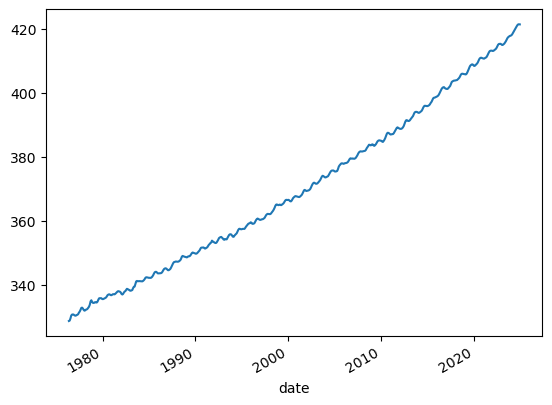

In [27]:
df["CO2(ppm)"].plot();

Before, we called `.plot()`, which generated a single line plot. Line plots can be helpful for understanding some types of data, but there are other types of data that can be better understood with different plot types. For example, if your data values form a distribution, you can better understand them using a histogram plot.

The code for plotting histogram data differs in two ways from the code above for the line plot. First, two series are being used from the `DataFrame` instead of one.  Second, after calling the `plot` method, we call an additional method called `hist`, which converts the plot into a histogram.

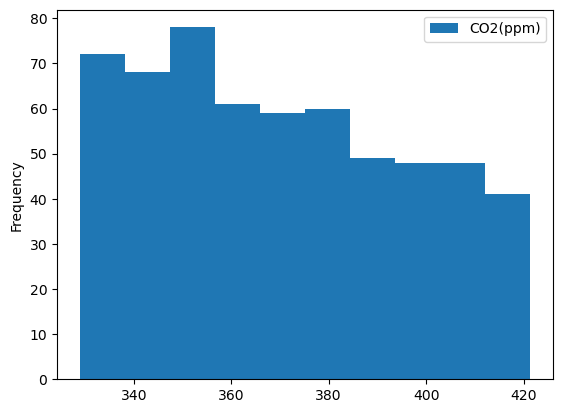

In [28]:
df[['CO2(ppm)']].plot.hist();

The histogram plot helped us better understand our data; there are clear differences in the distributions. To even better understand this type of data, it may also be helpful to create a box plot. This can be done using the same line of code, with one change: we call the `box` method instead of `hist`.

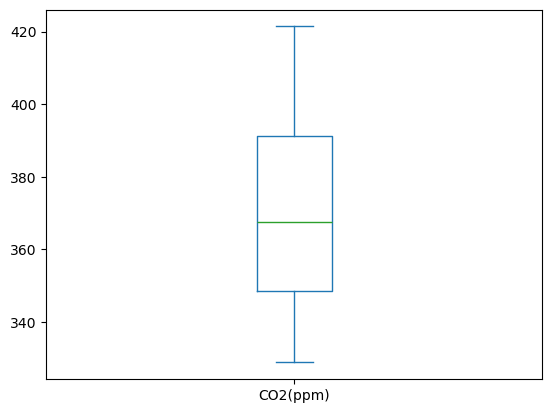

In [29]:
df[['CO2(ppm)']].plot.box();

Just like the histogram plot, this box plot indicates a clear difference in the distributions. Using multiple types of plot in this way can be useful for verifying large datasets. The pandas plotting methods are capable of creating many different types of plots. To see how to use the plotting methods to generate each type of plot, please review the [pandas plot documentation](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.plot.html).

#### Customize your Plot
The pandas plotting methods are, in fact, wrappers for similar methods in matplotlib. This means that you can customize pandas plots by including keyword arguments to the plotting methods.  These keyword arguments, for the most part, are equivalent to their matplotlib counterparts.

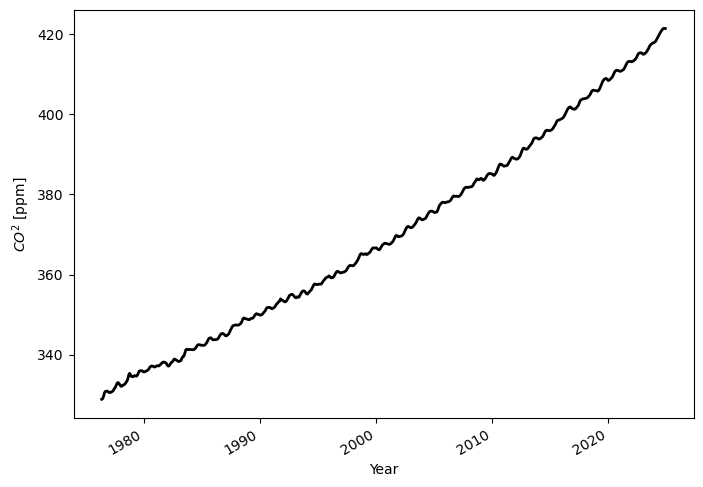

In [30]:
df['CO2(ppm)'].plot(
    color='black', # Change the color
    linewidth=2, # Make the line wider
    xlabel='Year', # Add a label to the xaxis
    ylabel=f'$CO^{2}$ [ppm]', # Add a label to the axis including units and latex syntax
    figsize=(8, 6), # Change the dimensions of the figure
);

Although plotting data can provide a clear visual picture of data values, sometimes a more quantitative look at data is warranted. As elaborated on in the next section, this can be achieved using the `describe` method.  The `describe` method is called on the entire `DataFrame`, and returns various summarized statistics for each column in the `DataFrame`.

### Basic Statistics

We can garner statistics for a `DataFrame` by using the `describe` method. When this method is called on a `DataFrame`, a set of statistics is returned in tabular format.  The columns match those of the `DataFrame`, and the rows indicate different statistics, such as minimum.

In [31]:
df.describe()

,DATE,CO2(ppm),SD(ppm),GR(ppm/yr)
count,584.000000,584.000000,584.000000,572.000000
mean,2000.661426,370.293872,0.170344,1.881241
std,14.060892,25.916594,0.057848,0.644109
min,1976.368900,328.861000,0.015000,-0.102997
25%,1988.515025,348.600750,0.136900,1.449760
50%,2000.662568,367.511500,0.167000,1.874510
75%,2012.808060,391.303250,0.200000,2.276505
max,2024.953550,421.414000,0.610600,3.920990


You can also view specific statistics using corresponding methods. In this example, we look at the mean values in the entire `DataFrame`, using the `mean` method.  When such methods are called on the entire `DataFrame`, a `Series` is returned. The indices of this `Series` are the column names in the `DataFrame`, and the values are the calculated values (in this case, mean values) for the `DataFrame` columns.

In [32]:
df["CO2(ppm)"].mean()

np.float64(370.29387157534245)

### Subsetting Using the Datetime Column

Slicing is a useful technique for subsetting a `DataFrame`, but there are also other options that can be equally useful. In this section, some of these additional techniques are covered.

If your `DataFrame` uses datetime values for indices, you can select data from only one month using `df.index.month`. In this example, we specify the number 1, which only selects data from January.

This example shows how to create a new column containing the month portion of the datetime index for each data row. The value returned by `df.index.month` is used to obtain the data for this new column:

In [33]:
df['month'] = df.index.month

This next example illustrates how to use the new month column to calculate average monthly values over the other data columns. First, we use the `groupby` method to group the other columns by the month.  Second, we take the average (mean) to obtain the monthly averages. Finally, we plot the resulting data as a line plot by simply calling `plot()`.

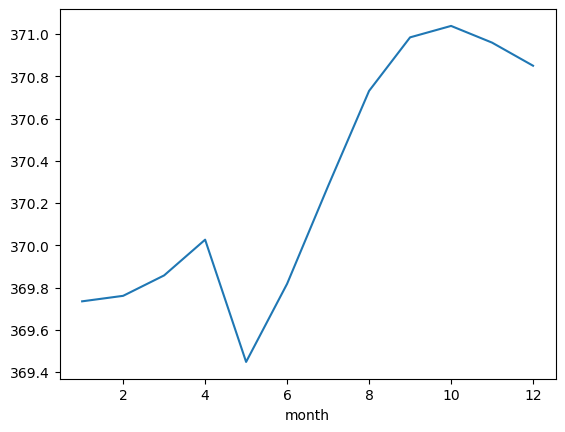

In [34]:
df.groupby('month')["CO2(ppm)"].mean().plot();

### Investigating Extreme Values

If you need to search for rows that meet a specific criterion, you can use **conditional indexing**.  In this example, we search for rows where the $CO^{2}$ values exceed the 95th percentile across all the data from the beginning of the record:

In [35]:
percentile_95 = df["CO2(ppm)"].quantile(.95) # Calculate the 95th percentile
df[df["CO2(ppm)"] > percentile_95] # Filter the data for greater than the 95th percentile

,DATE,CO2(ppm),SD(ppm),GR(ppm/yr),Source,month
date,,,,,,
2022-07-15,2022.53425,414.547,0.184,1.87201,in situ,7
2022-08-15,2022.61918,415.053,0.178,1.84100,in situ,8
2022-09-15,2022.70411,415.279,0.122,1.84702,in situ,9
2022-10-15,2022.78630,415.304,0.126,1.89099,in situ,10
2022-11-15,2022.87123,415.329,0.117,1.99701,in situ,11
2022-12-15,2022.95342,415.190,0.166,2.04501,in situ,12
2023-01-15,2023.03836,414.958,0.189,2.00900,in situ,1
2023-02-15,2023.12329,414.989,0.169,2.03000,in situ,2
2023-03-15,2023.20000,415.174,0.173,2.11401,in situ,3


This example shows how to use the `sort_values` method on a `DataFrame`. This method sorts values in a `DataFrame` by the column specified as an argument.

In [36]:
df.sort_values('CO2(ppm)')

,DATE,CO2(ppm),SD(ppm),GR(ppm/yr),Source,month
date,,,,,,
1976-05-15,1976.36890,328.861,0.165,NaN,in situ,5
1976-06-15,1976.45360,328.988,0.285,NaN,in situ,6
1976-07-15,1976.53550,329.653,0.282,NaN,in situ,7
1977-01-15,1977.03840,330.529,0.235,2.14697,in situ,1
1977-02-15,1977.12330,330.543,0.198,1.77701,in situ,2
...,...,...,...,...,...,...
2024-08-15,2024.62022,420.795,0.157,NaN,in situ,8
2024-09-15,2024.70492,421.180,0.139,NaN,in situ,9
2024-12-15,2024.95355,421.377,0.171,NaN,in situ,12


You can also reverse the ordering of the sort by specifying the `ascending` keyword argument as `False`:

In [37]:
df.sort_values('CO2(ppm)', ascending=False)

,DATE,CO2(ppm),SD(ppm),GR(ppm/yr),Source,month
date,,,,,,
2024-11-15,2024.87158,421.414,0.156,NaN,in situ,11
2024-10-15,2024.78689,421.397,0.097,NaN,in situ,10
2024-12-15,2024.95355,421.377,0.171,NaN,in situ,12
2024-09-15,2024.70492,421.180,0.139,NaN,in situ,9
2024-08-15,2024.62022,420.795,0.157,NaN,in situ,8
...,...,...,...,...,...,...
1977-02-15,1977.12330,330.543,0.198,1.77701,in situ,2
1977-01-15,1977.03840,330.529,0.235,2.14697,in situ,1
1976-07-15,1976.53550,329.653,0.282,NaN,in situ,7


### Resampling
In these examples, we illustrate a process known as resampling. Using resampling, you can change the frequency of index data values, reducing so-called 'noise' in a data plot. This is especially useful when working with timeseries data; plots can be equally effective with resampled data in these cases. The resampling performed in these examples converts monthly values to yearly averages. This is performed by passing the value '1YE' to the `resample` method.

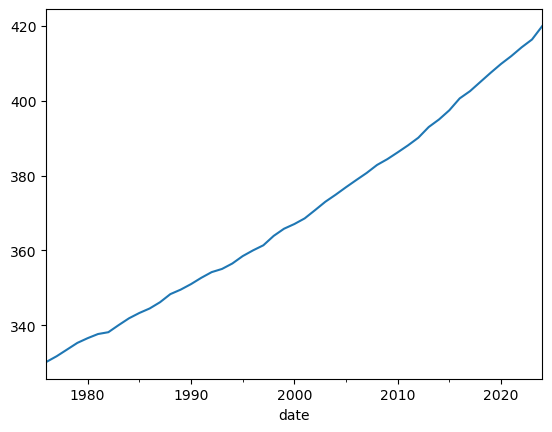

In [38]:
df['CO2(ppm)'].resample('1YE').mean().plot();

### Applying operations to a DataFrame

One of the most commonly used features in Pandas is the performing of calculations to multiple data values in a `DataFrame` simultaneously. Let's first look at a familiar concept: a function that converts single values.  The following example uses such a function to convert concentrations from parts ber million (ppm) to parts per billion (ppb):

In [39]:
def convert_ppm_to_ppb(concentration_ppm):
    """
    Converts from parts per million to parts per billion
    """

    return concentration_ppm * 1000

In [40]:
# Convert a single value
convert_ppm_to_ppb(1)

1000

The following examples instead illustrate a new concept: using such functions with `DataFrames` and `Series`. For the first example, we start by creating a `Series`; in order to do so, we subset the `DataFrame` by the `CO2(ppm)` column. This has already been done earlier in this page; we do not need to create this `Series` again. We are using this particular `Series` for a reason: the data values are in parts per million.

In [41]:
co2_series

date
1976-05-15    328.861
1976-06-15    328.988
1976-07-15    329.653
1976-08-15    330.550
1976-09-15    330.872
               ...   
2024-08-15    420.795
2024-09-15    421.180
2024-10-15    421.397
2024-11-15    421.414
2024-12-15    421.377
Name: CO2(ppm), Length: 584, dtype: float64

This example illustrates how to use the temperature-conversion function defined above on a `Series` object. Just as calling the function with a single value returns a single value, calling the function on a `Series` object returns another `Series` object. The function performs the temperature conversion on each data value in the `Series`, and returns a `Series` with all values converted.

In [42]:
convert_ppm_to_ppb(co2_series)

date
1976-05-15    328861.0
1976-06-15    328988.0
1976-07-15    329653.0
1976-08-15    330550.0
1976-09-15    330872.0
                ...   
2024-08-15    420795.0
2024-09-15    421180.0
2024-10-15    421397.0
2024-11-15    421414.0
2024-12-15    421377.0
Name: CO2(ppm), Length: 584, dtype: float64

If we call the `.values` method on the `Series` passed to the function, the `Series` is converted to a numpy array, as described above. The function then converts each value in the numpy array, and returns a new numpy array with all values sorted.

<div class="admonition alert alert-warning">
    <p class="admonition-title" style="font-weight:bold">Warning</p>
    It is recommended to only convert <code>Series</code> to NumPy arrays when necessary; doing so removes the label information that enables much of the Pandas core functionality.
</div>

In [43]:
convert_ppm_to_ppb(co2_series.values)

array([328861., 328988., 329653., 330550., 330872., 330899., 330883.,
       330677., 330529., 330543., 330724., 330805., 331007., 331500.,
       331800., 332327., 332940., 333034., 332778., 332377., 332094.,
       332175., 332398., 332474., 332646., 333015., 333317., 333926.,
       334977., 335333., 334826., 334531., 334498., 334585., 334763.,
       334703., 334626., 334889., 335452., 335936., 335981., 335979.,
       335971., 335733., 335678., 335778., 335898., 336057., 336185.,
       336532., 336930., 337096., 337190., 337116., 336938., 336916.,
       337089., 337230., 337226., 337174., 337346., 337587., 337832.,
       338093., 338165., 338072., 338000., 337768., 337306., 337127.,
       337274., 337698., 338032., 338186., 338551., 338898., 338822.,
       338634., 338557., 338328., 338307., 338427., 338519., 339115.,
       339532., 339601., 340338., 341204., 341354., 341257., 341296.,
       341307., 341273., 341271., 341242., 341232., 341390., 341620.,
       341935., 3423

As described above, when our temperature-conversion function accepts a `Series` as an argument, it returns a `Series`. We can directly assign this returned `Series` to a new column in our `DataFrame`, as shown below:

In [44]:
df['CO2(ppb)'] =convert_ppm_to_ppb(co2_series)
df['CO2(ppb)']

date
1976-05-15    328861.0
1976-06-15    328988.0
1976-07-15    329653.0
1976-08-15    330550.0
1976-09-15    330872.0
                ...   
2024-08-15    420795.0
2024-09-15    421180.0
2024-10-15    421397.0
2024-11-15    421414.0
2024-12-15    421377.0
Name: CO2(ppb), Length: 584, dtype: float64

In this final example, we demonstrate the use of the `to_csv` method to save a `DataFrame` as a `.csv` file. This example also demonstrates the `read_csv` method, which reads `.csv` files into Pandas `DataFrames`.

In [45]:
df.to_csv("CapeGrim_CO2_data_analyzed.csv")

In [46]:
pd.read_csv('CapeGrim_CO2_data_analyzed.csv', index_col=0, parse_dates=True)

,DATE,CO2(ppm),SD(ppm),GR(ppm/yr),Source,month,CO2(ppb)
date,,,,,,,
1976-05-15,1976.36890,328.861,0.165,NaN,in situ,5,328861.0
1976-06-15,1976.45360,328.988,0.285,NaN,in situ,6,328988.0
1976-07-15,1976.53550,329.653,0.282,NaN,in situ,7,329653.0
1976-08-15,1976.62020,330.550,0.201,NaN,in situ,8,330550.0
1976-09-15,1976.70490,330.872,0.234,NaN,in situ,9,330872.0
...,...,...,...,...,...,...,...
2024-08-15,2024.62022,420.795,0.157,NaN,in situ,8,420795.0
2024-09-15,2024.70492,421.180,0.139,NaN,in situ,9,421180.0
2024-10-15,2024.78689,421.397,0.097,NaN,in situ,10,421397.0


---
## Summary
* Pandas is a very powerful tool for working with tabular (i.e., spreadsheet-style) data
* There are multiple ways of subsetting your pandas dataframe or series
* Pandas allows you to refer to subsets of data by label, which generally makes code more readable and more robust
* Pandas can be helpful for exploratory data analysis, including plotting and basic statistics
* One can apply calculations to pandas dataframes and save the output via `csv` files

### What's Next?
In the next notebook, we will take a look at how to work with cloud radar/remote sensing data.

## Resources and References
1. [CSIRO Data Page](https://www.csiro.au/en/research/natural-environment/atmosphere/latest-greenhouse-gas-data)
1. [Getting Started with Pandas](https://pandas.pydata.org/docs/getting_started/index.html#getting-started)
1. [Pandas User Guide](https://pandas.pydata.org/docs/user_guide/index.html#user-guide)